In [1]:
PATH_NEW = '/content/drive/MyDrive/ML/Data_Driven_Marketing/Data-Driven-Marketing-Project2/Data/fillna.csv'
PATH = '/content/drive/MyDrive/ML/Data_Driven_Marketing/Data-Driven-Marketing-Project2/Data/bank-additional-full.csv'


# LIB

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression

# HELPFUL FUNCTION

In [3]:
def apply_duration(x):
  if x < 120:
    return 'less_2mins'
  elif (x >= 120) & (x < 240):
    return '2mins_4mins'
  else:
    return 'more_4mins'

In [4]:
def apply_campaign(x):
  if x >= 3:
    return 'more_than_two'
  elif x == 1:
    return 'one'
  elif x == 2:
    return 'two'

In [5]:
def apply_pdays(x):
  if x == 999:
    return 'more'
  else:
    return 'less'

In [6]:
def apply_previous(x):
  if x >= 3:
    return 'more_than_2'
  elif x == 0:
    return 'zero'
  elif x == 1:
    return 'one'
  elif x == 2:
    return 'two'

In [7]:
def apply_y(x):
  if x == 'yes':
    return 1
  else:
    return 0

In [8]:
def one_hot(df, cols):
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    df = df.drop(columns = cols)
    return df

# SIMPLE MOLDEL

In [9]:
model = LogisticRegression()

# PREPROCESSING

In [10]:
dat1 = pd.read_csv(PATH_NEW)
dat1 = dat1.drop(columns = ['Unnamed: 0'])
dat1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,job_rank,month_name,day_name
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,old,1,5,2
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,old,2,5,2
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,middle_age,2,5,2
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,middle_age,2,5,2
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,old,2,5,2


In [11]:
dat1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
age_group         0
job_rank          0
month_name        0
day_name          0
dtype: int64

In [12]:
dat1.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_rank,month_name,day_name
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607,-0.087336,0.077098,-0.018443
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672,-0.001777,-0.019246,0.010527
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129,0.004712,-0.030598,0.015061
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659,0.073285,-0.079583,0.006769
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411,-0.055317,0.063792,0.004009
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949,0.067916,0.058907,-0.004371
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945,0.017970,-0.150309,-0.004607
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679,-0.061685,0.264139,-0.000021
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146,0.078213,0.163425,-0.005513
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000,0.101068,0.132719,-0.000702


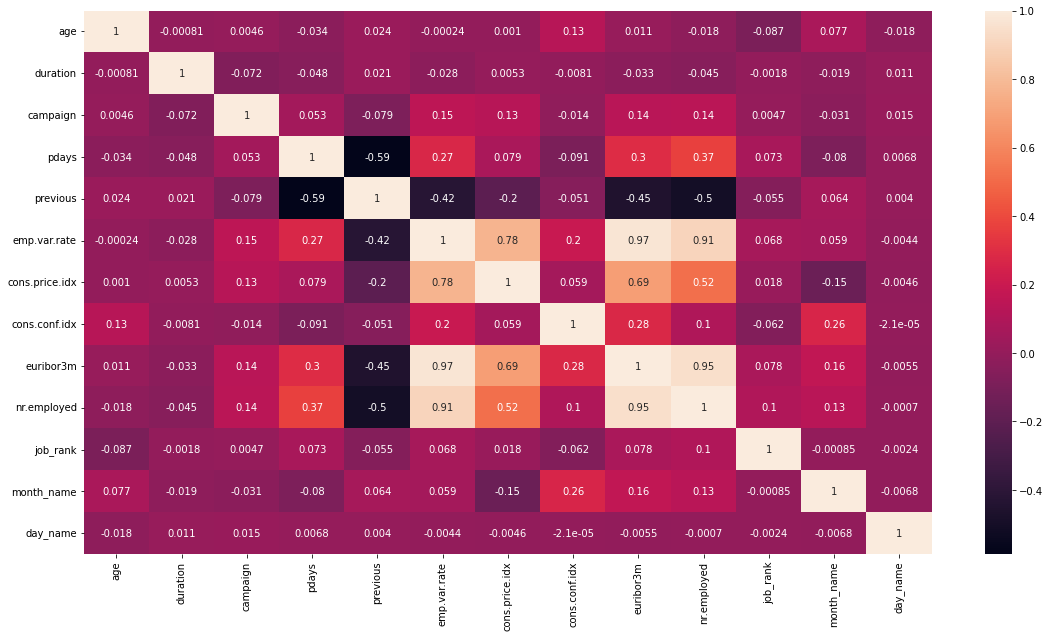

In [13]:
import seaborn
plt.figure(figsize=[19,10])
seaborn.heatmap(dat1.corr(),annot=True)

In [14]:
for a in range(len(dat1.corr().columns)):
    for b in range(a):
        if abs(dat1.corr().iloc[a,b]) >0.7:
            name = dat1.corr().columns[a]
            print(name)
print("none")

cons.price.idx
euribor3m
nr.employed
nr.employed
none


In [15]:
dat2 = dat1.drop(columns = ['nr.employed', 'euribor3m', 'cons.price.idx'])
for a in range(len(dat2.corr().columns)):
    for b in range(a):
        if abs(dat2.corr().iloc[a,b]) >0.7:
            name = dat2.corr().columns[a]
            print(name)
print("none")

none


# Contact

In [16]:
dat2['contact'].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

# Duration

In [17]:
dat2['duration'].value_counts()

90      170
85      170
136     168
73      167
124     163
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: duration, Length: 1544, dtype: int64

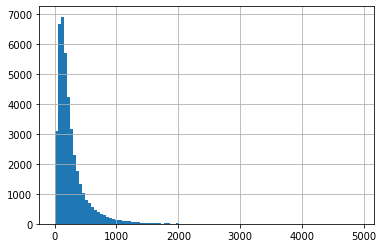

In [18]:
dat2['duration'].hist(bins = 100)

In [19]:
dat2.shape

(41176, 22)

In [20]:
dat2[dat2['duration'] < 120].shape

(12791, 22)

In [21]:
dat2[(dat2['duration'] >=120)&(dat2['duration'] < 240)].shape

(13293, 22)

In [22]:
dat2[dat2['duration'] >240].shape

(15005, 22)

In [23]:
dat2['duration_group'] = dat2['duration'].apply(lambda x : apply_duration(x))
dat2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,y,age_group,job_rank,month_name,day_name,duration_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,-36.4,no,old,1,5,2,more_4mins
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,-36.4,no,old,2,5,2,2mins_4mins
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,-36.4,no,middle_age,2,5,2,2mins_4mins
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,-36.4,no,middle_age,2,5,2,2mins_4mins
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,-36.4,no,old,2,5,2,more_4mins


# Campaign

In [24]:
dat2['campaign'].value_counts()

1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

In [25]:
dat2['campaign_group'] = dat2['campaign'].apply(lambda x : apply_campaign(x))
dat2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,y,age_group,job_rank,month_name,day_name,duration_group,campaign_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,-36.4,no,old,1,5,2,more_4mins,one
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,-36.4,no,old,2,5,2,2mins_4mins,one
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,-36.4,no,middle_age,2,5,2,2mins_4mins,one
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,-36.4,no,middle_age,2,5,2,2mins_4mins,one
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,-36.4,no,old,2,5,2,more_4mins,one


# Pdays

In [26]:
dat2['pdays'].value_counts()

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [27]:
dat2['pdays_group'] = dat2['campaign'].apply(lambda x : apply_pdays(x))
dat2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,y,age_group,job_rank,month_name,day_name,duration_group,campaign_group,pdays_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,-36.4,no,old,1,5,2,more_4mins,one,less
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,-36.4,no,old,2,5,2,2mins_4mins,one,less
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,-36.4,no,middle_age,2,5,2,2mins_4mins,one,less
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,-36.4,no,middle_age,2,5,2,2mins_4mins,one,less
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,-36.4,no,old,2,5,2,more_4mins,one,less


# Previous

In [28]:
dat2['previous'].value_counts()

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [29]:
dat2['previous_group'] = dat2['previous'].apply(lambda x : apply_previous(x))
dat2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,y,age_group,job_rank,month_name,day_name,duration_group,campaign_group,pdays_group,previous_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,-36.4,no,old,1,5,2,more_4mins,one,less,zero
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,-36.4,no,old,2,5,2,2mins_4mins,one,less,zero
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,-36.4,no,middle_age,2,5,2,2mins_4mins,one,less,zero
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,-36.4,no,middle_age,2,5,2,2mins_4mins,one,less,zero
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,-36.4,no,old,2,5,2,more_4mins,one,less,zero


# Poutcome

In [30]:
dat2['poutcome'].value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [31]:
dat2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,y,age_group,job_rank,month_name,day_name,duration_group,campaign_group,pdays_group,previous_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,-36.4,no,old,1,5,2,more_4mins,one,less,zero
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,-36.4,no,old,2,5,2,2mins_4mins,one,less,zero
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,-36.4,no,middle_age,2,5,2,2mins_4mins,one,less,zero
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,-36.4,no,middle_age,2,5,2,2mins_4mins,one,less,zero
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,-36.4,no,old,2,5,2,more_4mins,one,less,zero


In [32]:
dat2['cons.conf.idx'].value_counts()

-36.4    7762
-42.7    6681
-46.2    5793
-36.1    5173
-41.8    4374
-42.0    3615
-47.1    2457
-31.4     770
-40.8     715
-26.9     446
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     177
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

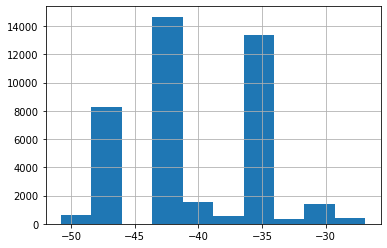

In [33]:
dat2['cons.conf.idx'].hist()

In [34]:
df = dat2.copy()

In [35]:
df = df.drop(columns = ['job', 'education','pdays', 'month', 'day_of_week'])

# Standarscale

In [36]:
cat_feats = [col for col in df.columns\
             if df[col].dtypes=='object']
num_feats = [col for col in df.columns\
            if df[col].dtypes!='object']
print('number of categorical features:',len(cat_feats))
print('number of numeric features:',len(num_feats))

number of categorical features: 12
number of numeric features: 9


In [37]:
num_feats

['age',
 'duration',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.conf.idx',
 'job_rank',
 'month_name',
 'day_name']

In [38]:
scaler = sklearn.preprocessing.StandardScaler()
maxmin = sklearn.preprocessing.MinMaxScaler()
df[num_feats[1:-2]] = scaler.fit_transform(df[num_feats[1:-2]])
df[['age', 'month_name', 'day_name']] = maxmin.fit_transform(df[['age', 'month_name', 'day_name']])

In [39]:
df.head()

,age,marital,default,housing,loan,contact,duration,campaign,previous,poutcome,emp.var.rate,cons.conf.idx,y,age_group,job_rank,month_name,day_name,duration_group,campaign_group,pdays_group,previous_group
0,0.481481,married,no,no,no,telephone,0.010352,-0.565963,-0.349551,nonexistent,0.648101,0.886568,no,old,-1.750910,0.222222,0.0,more_4mins,one,less,zero
1,0.493827,married,no,no,no,telephone,-0.421577,-0.565963,-0.349551,nonexistent,0.648101,0.886568,no,old,-0.005088,0.222222,0.0,2mins_4mins,one,less,zero
2,0.246914,married,no,yes,no,telephone,-0.124626,-0.565963,-0.349551,nonexistent,0.648101,0.886568,no,middle_age,-0.005088,0.222222,0.0,2mins_4mins,one,less,zero
3,0.283951,married,no,no,no,telephone,-0.413864,-0.565963,-0.349551,nonexistent,0.648101,0.886568,no,middle_age,-0.005088,0.222222,0.0,2mins_4mins,one,less,zero
4,0.481481,married,no,no,yes,telephone,0.187751,-0.565963,-0.349551,nonexistent,0.648101,0.886568,no,old,-0.005088,0.222222,0.0,more_4mins,one,less,zero


# y

In [40]:
df['y'] = df['y'].apply(lambda x : apply_y(x))
df.head()

,age,marital,default,housing,loan,contact,duration,campaign,previous,poutcome,emp.var.rate,cons.conf.idx,y,age_group,job_rank,month_name,day_name,duration_group,campaign_group,pdays_group,previous_group
0,0.481481,married,no,no,no,telephone,0.010352,-0.565963,-0.349551,nonexistent,0.648101,0.886568,0,old,-1.750910,0.222222,0.0,more_4mins,one,less,zero
1,0.493827,married,no,no,no,telephone,-0.421577,-0.565963,-0.349551,nonexistent,0.648101,0.886568,0,old,-0.005088,0.222222,0.0,2mins_4mins,one,less,zero
2,0.246914,married,no,yes,no,telephone,-0.124626,-0.565963,-0.349551,nonexistent,0.648101,0.886568,0,middle_age,-0.005088,0.222222,0.0,2mins_4mins,one,less,zero
3,0.283951,married,no,no,no,telephone,-0.413864,-0.565963,-0.349551,nonexistent,0.648101,0.886568,0,middle_age,-0.005088,0.222222,0.0,2mins_4mins,one,less,zero
4,0.481481,married,no,no,yes,telephone,0.187751,-0.565963,-0.349551,nonexistent,0.648101,0.886568,0,old,-0.005088,0.222222,0.0,more_4mins,one,less,zero


# OneHot

In [41]:
cat_feats = [col for col in df.columns\
             if df[col].dtypes=='object']
cat_feats

['marital',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'age_group',
 'duration_group',
 'campaign_group',
 'pdays_group',
 'previous_group']

In [42]:
final_df = one_hot(df, cat_feats)
final_df.head()

,age,duration,campaign,previous,emp.var.rate,cons.conf.idx,y,job_rank,month_name,day_name,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,age_group_middle_age,age_group_old,age_group_young,duration_group_2mins_4mins,duration_group_less_2mins,duration_group_more_4mins,campaign_group_more_than_two,campaign_group_one,campaign_group_two,pdays_group_less,previous_group_more_than_2,previous_group_one,previous_group_two,previous_group_zero
0,0.481481,0.010352,-0.565963,-0.349551,0.648101,0.886568,0,-1.750910,0.222222,0.0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1
1,0.493827,-0.421577,-0.565963,-0.349551,0.648101,0.886568,0,-0.005088,0.222222,0.0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
2,0.246914,-0.124626,-0.565963,-0.349551,0.648101,0.886568,0,-0.005088,0.222222,0.0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
3,0.283951,-0.413864,-0.565963,-0.349551,0.648101,0.886568,0,-0.005088,0.222222,0.0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
4,0.481481,0.187751,-0.565963,-0.349551,0.648101,0.886568,0,-0.005088,0.222222,0.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1


In [43]:
final_df.to_csv('/content/drive/MyDrive/ML/Data_Driven_Marketing/Data-Driven-Marketing-Project2/Data/final_df1.csv')